In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls

# Single file

In [ ]:
import librosa
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
print(x.shape)
print(sr)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=x, rate=sr)

In [ ]:
single_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(single_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
single_mfcc

# Whole Dataset (1440 files)

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix, classification_report
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 =

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [2]:
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"

actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [3]:
# audio/audio/audio_speech_actors_01-24/Actor_14
# 03-01-02-01-02-01-14.wav

emotion = []
gender = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [4]:
os.listdir(audio + i)

['03-01-03-02-01-02-24.wav',
 '03-01-03-01-02-02-24.wav',
 '03-01-02-02-02-01-24.wav',
 '03-01-02-01-01-01-24.wav',
 '03-01-01-01-01-02-24.wav',
 '03-01-06-01-01-02-24.wav',
 '03-01-05-01-01-01-24.wav',
 '03-01-05-02-02-01-24.wav',
 '03-01-06-02-02-02-24.wav',
 '03-01-04-01-02-02-24.wav',
 '03-01-07-01-02-01-24.wav',
 '03-01-07-02-01-01-24.wav',
 '03-01-04-02-01-02-24.wav',
 '03-01-08-02-01-01-24.wav',
 '03-01-08-01-02-01-24.wav',
 '03-01-05-01-02-02-24.wav',
 '03-01-06-01-02-01-24.wav',
 '03-01-06-02-01-01-24.wav',
 '03-01-05-02-01-02-24.wav',
 '03-01-07-01-01-02-24.wav',
 '03-01-04-01-01-01-24.wav',
 '03-01-04-02-02-01-24.wav',
 '03-01-07-02-02-02-24.wav',
 '03-01-08-02-02-02-24.wav',
 '03-01-08-01-01-02-24.wav',
 '03-01-03-02-02-01-24.wav',
 '03-01-03-01-01-01-24.wav',
 '03-01-02-02-01-02-24.wav',
 '03-01-01-01-02-01-24.wav',
 '03-01-02-01-02-02-24.wav',
 '03-01-04-02-01-01-24.wav',
 '03-01-07-02-01-02-24.wav',
 '03-01-07-01-02-02-24.wav',
 '03-01-04-01-02-01-24.wav',
 '03-01-06-02-

In [5]:
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df
audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
audio_df.columns = ['gender','emotion']
# audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
# audio_df = audio_df.drop(['gender', 'emotion'], axis=1)
# audio_df.labels.value_counts()
audio_df

# audio_df = pd.DataFrame(emotion)
# audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
# audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
# audio_df.columns = ['gender','emotion']
# audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
# audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
# audio_df = audio_df.drop(['gender', 'emotion'], axis=1)
# audio_df.labels.value_counts()

,gender,emotion,path
0,male,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
1,male,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
2,male,angry,/Users/murielkosaka/Desktop/capstone_project/a...
3,male,fear,/Users/murielkosaka/Desktop/capstone_project/a...
4,male,fear,/Users/murielkosaka/Desktop/capstone_project/a...
...,...,...,...
1435,female,fear,/Users/murielkosaka/Desktop/capstone_project/a...
1436,female,fear,/Users/murielkosaka/Desktop/capstone_project/a...
1437,female,angry,/Users/murielkosaka/Desktop/capstone_project/a...
1438,female,surprise,/Users/murielkosaka/Desktop/capstone_project/a...


In [6]:
audio_df.drop(columns='gender',inplace=True)

In [ ]:
audio_df

In [ ]:
audio_df.to_csv('audio.csv')

In [ ]:

os.listdir(audio)

In [ ]:
fname = audio + 'Actor_02/03-01-01-01-01-01-02.wav'  #female neutral
data_neutral, sr_neutral = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data_neutral, sr=sr_neutral)
ipd.Audio(fname)

In [ ]:
fname = audio + 'Actor_02/03-01-02-01-01-01-02.wav'  #female calm
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data, sr=sampling_rate)
ipd.Audio(fname)


# MFCC
### The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. MFCC is a good "representation" of the vocal tract that produces the sound. Think of it like an x-ray of your mouth

In [ ]:
fa_mfcc = librosa.feature.mfcc(y=data_neutral, sr=sr_neutral, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(fa_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
# MFCC
#The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features 
#(usually about 10–20) which concisely describe the overall shape of a spectral envelope.
# good "representation" of the vocal tract that produces the sound. Think of it like an 
# x-ray of your mouth
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar();

In [ ]:
mfcc.shape

In [ ]:
# Male surprised
pathh = audio + 'Actor_09/03-01-08-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
male = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(male))

# Female surprised
path= audio + 'Actor_08/03-01-08-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
female = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(female))

# Male happy
pathh = audio + 'Actor_09/03-01-03-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male1 = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
male1 = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(male1))

# Female happy
path= audio + 'Actor_08/03-01-03-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female1 = librosa.feature.spectral_centroid(y=X, sr=sample_rate)
female1 = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate), axis=0)
print(len(female1))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='Female Surprised')
plt.plot(male, label='Male Surprised')
plt.plot(female1, label='Female happy')
plt.plot(male1, label='Male happy')
plt.legend()



In [ ]:
# Male surprised
pathh = audio + 'Actor_09/03-01-08-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Female surprised
path= audio + 'Actor_08/03-01-08-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='Female Surprised')
plt.plot(male, label='Male Surprised')
plt.legend()



In [ ]:
# Spectrogram - how the audio spectrum varies as a function of time
spectrogram = librosa.feature.melspectrogram(y=X, sr=sampling_rate)
db_spec = librosa.power_to_db(spectrogram, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar();

## Feature Extraction

In [23]:
df = pd.DataFrame(columns=['log_spec'])

counter=0

for index,path in enumerate(audio_df.path):
    #get wave representation
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
        
#     #Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     #temporal averaging
#     mfcc=np.mean(mfcc,axis=0)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    
#     #compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     #temporally average chroma
#     chroma = np.mean(chroma, axis = 0)
    
    # #compute spectral contrast
    # contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
    # contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
    # which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
    # zcr = librosa.feature.zero_crossing_rate(y=X)
    # zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,log_spec
0,"[-71.20022, -71.20022, -71.20022, -71.20022, -..."
1,"[-70.46105, -70.46105, -70.46105, -70.46105, -..."
2,"[-64.17679, -64.39374, -64.444954, -64.26804, ..."
3,"[-73.2803, -73.2803, -73.2803, -73.2803, -73.2..."
4,"[-44.965843, -44.467876, -44.512608, -44.93480..."


In [ ]:
# def extract_feature(file_name, mfcc, chroma, mel):
#     with soundfile.SoundFile(file_name) as sound_file:
#         X = sound_file.read(dtype="float32")
#         sample_rate=sound_file.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result=np.array([])
#         if mfcc:
#             mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#             result=np.hstack((result, mfccs))
#         if chroma:
#             chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, chroma))
#         if mel:
#             mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, mel))

## CNN

In [24]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils, to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM

Using TensorFlow backend.


In [25]:
# SET MEANS TO THEIR OWN COLUMNS
df_combined = pd.concat([audio_df,pd.DataFrame(df['log_spec'].values.tolist()),
#                          pd.DataFrame(df['chroma_feat'].values.tolist()),
#                          pd.DataFrame(df['spec_feat'].values.tolist())
                         ],axis=1)
df_combined = df_combined.fillna(0)

In [ ]:
df_combined.drop(columns='path',inplace=True)

In [ ]:
df_combined.head()

In [ ]:
emotions=df_combined.emotion
emotions.value_counts()

In [ ]:
# SET MEANS TO THEIR OWN COLUMNS

df_combined = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist()),pd.DataFrame(df_chroma['chroma_feat'].values.tolist())],axis=1)
df_combined.head()

In [ ]:
# SET MEANS TO THEIR OWN COLUMNS
df = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist())],axis=1)
df=df.fillna(0)

In [ ]:
# TRAIN TEST SPLIT
X_model, X_test, y_model, y_test = train_test_split(df_combined.drop(['path','emotion'],axis=1)
                                                    , df_combined.emotion
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )
# TRAIN TEST SPLIT
X_train, X_validation, y_train, y_validation = train_test_split(X_model
                                                    , y_model
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )



In [ ]:
X_model.shape

In [ ]:
y_test.value_counts().plot(kind='bar')

In [ ]:
y_train.value_counts().plot(kind='bar')

In [ ]:
y_validation.value_counts().plot(kind='bar')

In [ ]:
X_model.shape

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_validation = (X_validation - mean) / std


# Check the dataset now 
# X_train[150:160]

In [ ]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_validation=np.array(X_validation)
y_validation=np.array(y_validation)

In [ ]:
y_validation

In [ ]:
len(y_test)

In [ ]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
y_validation = to_categorical(lb.fit_transform(y_validation))


print(y_validation[0:10])

In [ ]:
print(lb.classes_)

In [ ]:
y_test

In [ ]:
#time series data requires kernel sliding in only one dimension and have spatial properties: 1d CNN
# reshape data to 3d tensor
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_validation = X_validation[:,:,np.newaxis]

X_validation.shape

In [ ]:
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.regularizers import l2


# acc-51,test acc-48
model = Sequential()
model.add(Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.2))
model.add(Conv1D(128, kernel_size=(10),activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.2))
# model.add(Conv1D(256, kernel_size=(4), activation='relu'))
# model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
model.summary()
opt = keras.optimizers.Adam(lr=0.0001)

# #acc-61,test acc-54
# model = Sequential()
# model.add(Conv1D(64, kernel_size=(8), activation='relu', input_shape=(X_train.shape[1],1)))
# model.add(Conv1D(128, kernel_size=(8),activation='relu'))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Dropout(0.2))
# model.add(Conv1D(128, kernel_size=(8),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Dropout(0.2))
# # model.add(Conv1D(256, kernel_size=(4), activation='relu'))
# # model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax'))
# model.summary()
# opt = keras.optimizers.Adam(lr=0.0001)

# acc-82, test acc-49
# model = Sequential()
# model.add(Conv1D(64, kernel_size=(8), activation='relu', input_shape=(X_train.shape[1],1)))
# model.add(Conv1D(64, kernel_size=(8),activation='relu'))
# model.add(MaxPooling1D(pool_size=(4)))
# model.add(Dropout(0.2))
# model.add(Conv1D(128, kernel_size=(8),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(4)))
# model.add(Dropout(0.2))
# # model.add(Conv1D(256, kernel_size=(4), activation='relu'))
# # model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax'))
# model.summary()
# opt = keras.optimizers.Adam(lr=0.0001)


#BUILD CNN MODEL (even accuracy scores)
# model = Sequential()
# model.add(Conv1D(32, kernel_size=(8), activation='relu', input_shape=(X_train.shape[1],1)))
# model.add(Conv1D(64, kernel_size=(8),activation='relu'))
# model.add(MaxPooling1D(pool_size=(4)))
# model.add(Dropout(0.4))
# model.add(Conv1D(128, kernel_size=(8),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(4)))
# model.add(Dropout(0.4))
# # model.add(Conv1D(256, kernel_size=(4), activation='relu'))
# # model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(8, activation='softmax'))
# model.summary()
# opt = keras.optimizers.Adam(lr=0.0001)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

cb = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)
# FIT MODEL
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=32, epochs=50, validation_data=(X_validation, y_validation),callbacks=[cb])

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
actual=y_test.argmax(axis=1)

In [ ]:
import seaborn as sns

cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
# predictions 
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(predictions)
finaldf[140:150]

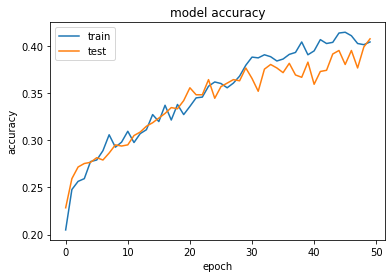

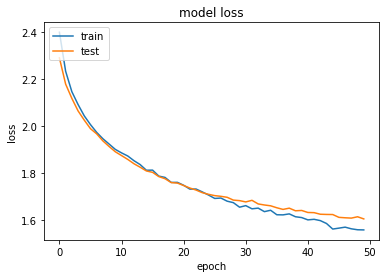

In [91]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Hyperparameter Tuning

In [ ]:
import h5py
hf = h5py.File('best_model.h5', 'r')
hf.keys

In [130]:
# TRAIN TEST SPLIT
X_model, X_test, y_model, y_test = train_test_split(combined_df.drop(['path','emotion'],axis=1)
                                                    , combined_df.emotion
                                                    , test_size=0.25
                                                    , shuffle=False
                                                    , random_state=42
                                                   )
# TRAIN TEST SPLIT
X_train, X_validation, y_train, y_validation = train_test_split(X_model
                                                    , y_model
                                                    , test_size=0.25
                                                    , shuffle=False
                                                    , random_state=42
                                                   )




In [131]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_validation = (X_validation - mean) / std




In [132]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_validation=np.array(X_validation)
y_validation=np.array(y_validation)

In [133]:
#time series data requires kernel sliding in only one dimension and have spatial properties: 1d CNN
# reshape data to 3d tensor
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_validation = X_validation[:,:,np.newaxis]

X_validation.shape

(810, 259, 1)

In [136]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def make_classifier(optimizer='adam'):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(Conv1D(32, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Dropout(0.25))
    model.add(Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Dropout(0.25))
# model.add(Conv1D(256, kernel_size=(4), activation='relu'))
# model.add(MaxPooling1D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model


In [137]:
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [10, 20, 30],
    'nb_epoch': [50, 100, 150],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
# best_param = grid_search.best_params_
# best_accuracy = grid_search.best_score_

Epoch 1/1
1944/1944 [==============================] - 45s 23ms/step - loss: 2.0502 - acc: 0.2526
Epoch 1/1
1944/1944 [==============================] - 21s 11ms/step - loss: 2.0137 - acc: 0.2423
Epoch 1/1
1944/1944 [==============================] - 17s 9ms/step - loss: 2.0027 - acc: 0.2587
Epoch 1/1
1944/1944 [==============================] - 17s 9ms/step - loss: 2.0234 - acc: 0.2551
Epoch 1/1
1944/1944 [==============================] - 18s 9ms/step - loss: 2.0135 - acc: 0.2562
Epoch 1/1
1944/1944 [==============================] - 17s 9ms/step - loss: 2.0396 - acc: 0.2325
Epoch 1/1
1944/1944 [==============================] - 17s 9ms/step - loss: 2.0227 - acc: 0.2623
Epoch 1/1
1944/1944 [==============================] - 17s 9ms/step - loss: 2.0041 - acc: 0.2515
Epoch 1/1
1944/1944 [==============================] - 18s 9ms/step - loss: 2.0187 - acc: 0.2505
Epoch 1/1
1944/1944 [==============================] - 19s 10ms/step - loss: 2.0146 - acc: 0.2572
Epoch 1/1
1944/1944 [======

1860/1944 [===========================>..] - ETA: 1s - loss: 2.1300 - acc: 0.2505

KeyboardInterrupt: 

In [107]:
print (best_param)
print (best_accuracy)

NameError: name 'best_param' is not defined

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())